# Tom Brady Exploration

## Exercise

Using a dataset and tools of their choosing I'd like them to deliver a presentation broken down into the following sections:
- Dataset Explanation 
- Process to Analyze the Data (Steps, Tools, Thought process)
- Analysis and Insights Derived

This analysis can be something he’s already done. I'd simply like to understand the thought process to analyze data, tools selected and how he constructed the analysis”

## Data 
Seeing as we had a superbowl recently. Let's analyze all the appearances of the GOAT, Tom Brady, in a superbowl (much to my chagrin). Tom Brady has in total made ten superbowl appearances with only 3 losses in the big game.

The following dataset below shows all of Tom Brady's super bowl appearances, with his individual game performance as well as the performance of all other players in each respective superbowl. 

Ultimately, my broad question is just how good is Tom Brady as quarterback? Is his performance on the decline? Or is he still in his stride?

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model


In [63]:
df= pd.read_csv('../data/tom_brady_data.csv')

sb_app={'202102070tam':2020,
        '201902030ram':2018,
        '201802040nwe':2017,
        '201702050atl':2016,
        '201502010sea':2014,
        '201202050nwe':2011,
        '200802030nwe':2007,
        '200502060nwe':2004,
        '200402010car':2003,
        '200202030nwe':2001
        }

## Research

### Data Exploration

In [6]:
df.columns

Index(['Unnamed: 0', 'name', 'team', 'completed_passes', 'attempted_passes',
       'passing_yards', 'passing_touchdowns', 'interceptions_thrown',
       'times_sacked', 'yards_lost_from_sacks', 'longest_pass',
       'quarterback_rating', 'rush_attempts', 'rush_yards', 'rush_touchdowns',
       'longest_rush', 'times_pass_target', 'receptions', 'receiving_yards',
       'receiving_touchdowns', 'longest_reception', 'fumbles', 'fumbles_lost',
       'interceptions', 'yards_returned_from_interception',
       'interceptions_returned_for_touchdown', 'longest_interception_return',
       'passes_defended', 'sacks', 'combined_tackles', 'solo_tackles',
       'assists_on_tackles', 'tackles_for_loss', 'quarterback_hits',
       'fumbles_recovered', 'yards_recovered_from_fumble',
       'fumbles_recovered_for_touchdown', 'fumbles_forced', 'kickoff_returns',
       'kickoff_return_yards', 'average_kickoff_return_yards',
       'kickoff_return_touchdown', 'longest_kickoff_return', 'punt_returns'

In [7]:
df.describe()

,completed_passes,attempted_passes,passing_yards,passing_touchdowns,interceptions_thrown,times_sacked,yards_lost_from_sacks,longest_pass,quarterback_rating,rush_attempts,...,longest_punt_return,extra_points_made,extra_points_attempted,field_goals_made,field_goals_attempted,punts,total_punt_yards,yards_per_punt,longest_punt,season
count,182.000000,182.000000,182.000000,182.000000,182.000000,101.000000,105.000000,182.000000,23.000000,182.000000,...,43.000000,17.000000,18.000000,16.000000,16.000000,39.000000,39.000000,19.000000,39.000000,602.000000
mean,2.763736,4.395604,33.181319,0.214286,0.093407,0.514851,3.361905,4.054945,91.591304,2.604396,...,4.232558,2.529412,2.555556,1.562500,1.937500,2.384615,101.974359,42.110526,25.410256,2010.842193
std,8.253190,12.949864,98.642079,0.707665,0.389163,1.245904,8.841689,12.617941,26.987403,5.033323,...,7.210565,0.943242,1.041618,0.727438,0.853913,2.806153,123.618149,3.751429,26.771664,6.595013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.600000,0.000000,...,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,34.600000,0.000000,2001.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.850000,0.000000,...,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,40.300000,0.000000,2004.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.200000,0.000000,...,0.000000,2.000000,2.500000,1.000000,2.000000,0.000000,0.000000,42.800000,0.000000,2011.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.400000,2.000000,...,7.000000,3.000000,3.000000,2.000000,3.000000,4.000000,174.000000,44.550000,51.000000,2017.000000
max,43.000000,62.000000,505.000000,4.000000,3.000000,5.000000,44.000000,85.000000,144.100000,26.000000,...,28.000000,4.000000,4.000000,3.000000,3.000000,9.000000,417.000000,49.000000,65.000000,2020.000000


In [8]:
df.head()

,Unnamed: 0,name,team,completed_passes,attempted_passes,passing_yards,passing_touchdowns,interceptions_thrown,times_sacked,yards_lost_from_sacks,...,longest_punt_return,extra_points_made,extra_points_attempted,field_goals_made,field_goals_attempted,punts,total_punt_yards,yards_per_punt,longest_punt,season
0,MahoPa00,Patrick Mahomes,kan,26.0,49.0,270.0,0.0,2.0,3.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,EdwaCl00,Clyde Edwards-Helaire,kan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,HillTy00,Tyreek Hill,kan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,WillDa10,Darrel Williams,kan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,KelcTr00,Travis Kelce,kan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0


In [9]:
# we're getting a lot of Nan's so let's replace those with zeroes
df=df.fillna(0)
df.head()

,Unnamed: 0,name,team,completed_passes,attempted_passes,passing_yards,passing_touchdowns,interceptions_thrown,times_sacked,yards_lost_from_sacks,...,longest_punt_return,extra_points_made,extra_points_attempted,field_goals_made,field_goals_attempted,punts,total_punt_yards,yards_per_punt,longest_punt,season
0,MahoPa00,Patrick Mahomes,kan,26.0,49.0,270.0,0.0,2.0,3.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
1,EdwaCl00,Clyde Edwards-Helaire,kan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
2,HillTy00,Tyreek Hill,kan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
3,WillDa10,Darrel Williams,kan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
4,KelcTr00,Travis Kelce,kan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0


In [32]:
## Also we have too many columns, most of which isn't relevant to the question 
qb_feat=['name','team','season','completed_passes','attempted_passes','passing_yards','passing_touchdowns',
        'interceptions_thrown','yards_lost_from_sacks','longest_pass','quarterback_rating','rush_attempts','rush_yards','rush_touchdowns']

qb_df=df[qb_feat]
qb_df=qb_df[qb_df['attempted_passes']>5]
qb_df=qb_df.sort_values('name')
qb_df['completion_perc']=qb_df['completed_passes']/qb_df['attempted_passes']
qb_df

,name,team,season,completed_passes,attempted_passes,passing_yards,passing_touchdowns,interceptions_thrown,yards_lost_from_sacks,longest_pass,quarterback_rating,rush_attempts,rush_yards,rush_touchdowns,completion_perc
446,Donovan McNabb,phi,2004.0,30.0,51.0,357.0,3.0,3.0,33.0,40.0,75.4,1.0,0.0,0.0,0.588235
380,Eli Manning,nyg,2007.0,19.0,34.0,255.0,2.0,1.0,8.0,45.0,87.3,3.0,4.0,0.0,0.558824
318,Eli Manning,nyg,2011.0,30.0,40.0,296.0,1.0,0.0,14.0,38.0,103.7,1.0,-1.0,0.0,0.750000
474,Jake Delhomme,car,2003.0,16.0,33.0,323.0,3.0,0.0,28.0,85.0,113.6,0.0,0.0,0.0,0.484848
90,Jared Goff,ram,2018.0,19.0,38.0,229.0,0.0,1.0,31.0,24.0,57.9,0.0,0.0,0.0,0.500000
571,Kurt Warner,ram,2001.0,28.0,44.0,365.0,1.0,2.0,28.0,30.0,78.3,3.0,6.0,1.0,0.636364
170,Matt Ryan,atl,2016.0,17.0,23.0,284.0,2.0,0.0,44.0,39.0,144.1,0.0,0.0,0.0,0.739130
141,Nick Foles,phi,2017.0,28.0,43.0,373.0,3.0,1.0,0.0,55.0,106.1,0.0,0.0,0.0,0.651163
0,Patrick Mahomes,kan,2020.0,26.0,49.0,270.0,0.0,2.0,27.0,33.0,52.3,5.0,33.0,0.0,0.530612
261,Russell Wilson,sea,2014.0,12.0,21.0,247.0,2.0,1.0,13.0,45.0,110.6,3.0,39.0,0.0,0.571429


In [140]:
qb_df.describe()

,season,completed_passes,attempted_passes,passing_yards,passing_touchdowns,interceptions_thrown,yards_lost_from_sacks,longest_pass,quarterback_rating,rush_attempts,rush_yards,rush_touchdowns,completion_perc,qb_rating_pred,abs_error
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2011.100000,25.100000,39.850000,301.900000,1.900000,0.850000,17.450000,36.850000,95.435000,1.500000,5.450000,0.050000,0.628528,95.435000,2.577561
std,6.719179,7.670175,10.529532,85.435664,1.165287,0.875094,12.999899,15.644992,22.462232,1.468977,11.472966,0.223607,0.080010,22.188445,2.287197
min,2001.000000,12.000000,21.000000,145.000000,0.000000,0.000000,0.000000,19.000000,52.300000,0.000000,-3.000000,0.000000,0.484848,42.494446,0.104443
25%,2004.000000,19.000000,33.000000,253.000000,1.000000,0.000000,7.750000,26.250000,81.450000,0.000000,-0.250000,0.000000,0.580357,82.606845,1.185150
50%,2012.500000,26.500000,40.500000,280.000000,2.000000,1.000000,13.500000,32.000000,97.850000,1.000000,0.000000,0.000000,0.620265,96.818854,1.819038
75%,2017.000000,29.250000,48.000000,354.750000,3.000000,1.000000,28.000000,45.000000,110.300000,2.250000,6.000000,0.000000,0.694404,110.084902,3.496799
max,2020.000000,43.000000,62.000000,505.000000,4.000000,3.000000,44.000000,85.000000,144.100000,5.000000,39.000000,1.000000,0.750000,139.651628,9.805554


<Figure size 720x720 with 0 Axes>

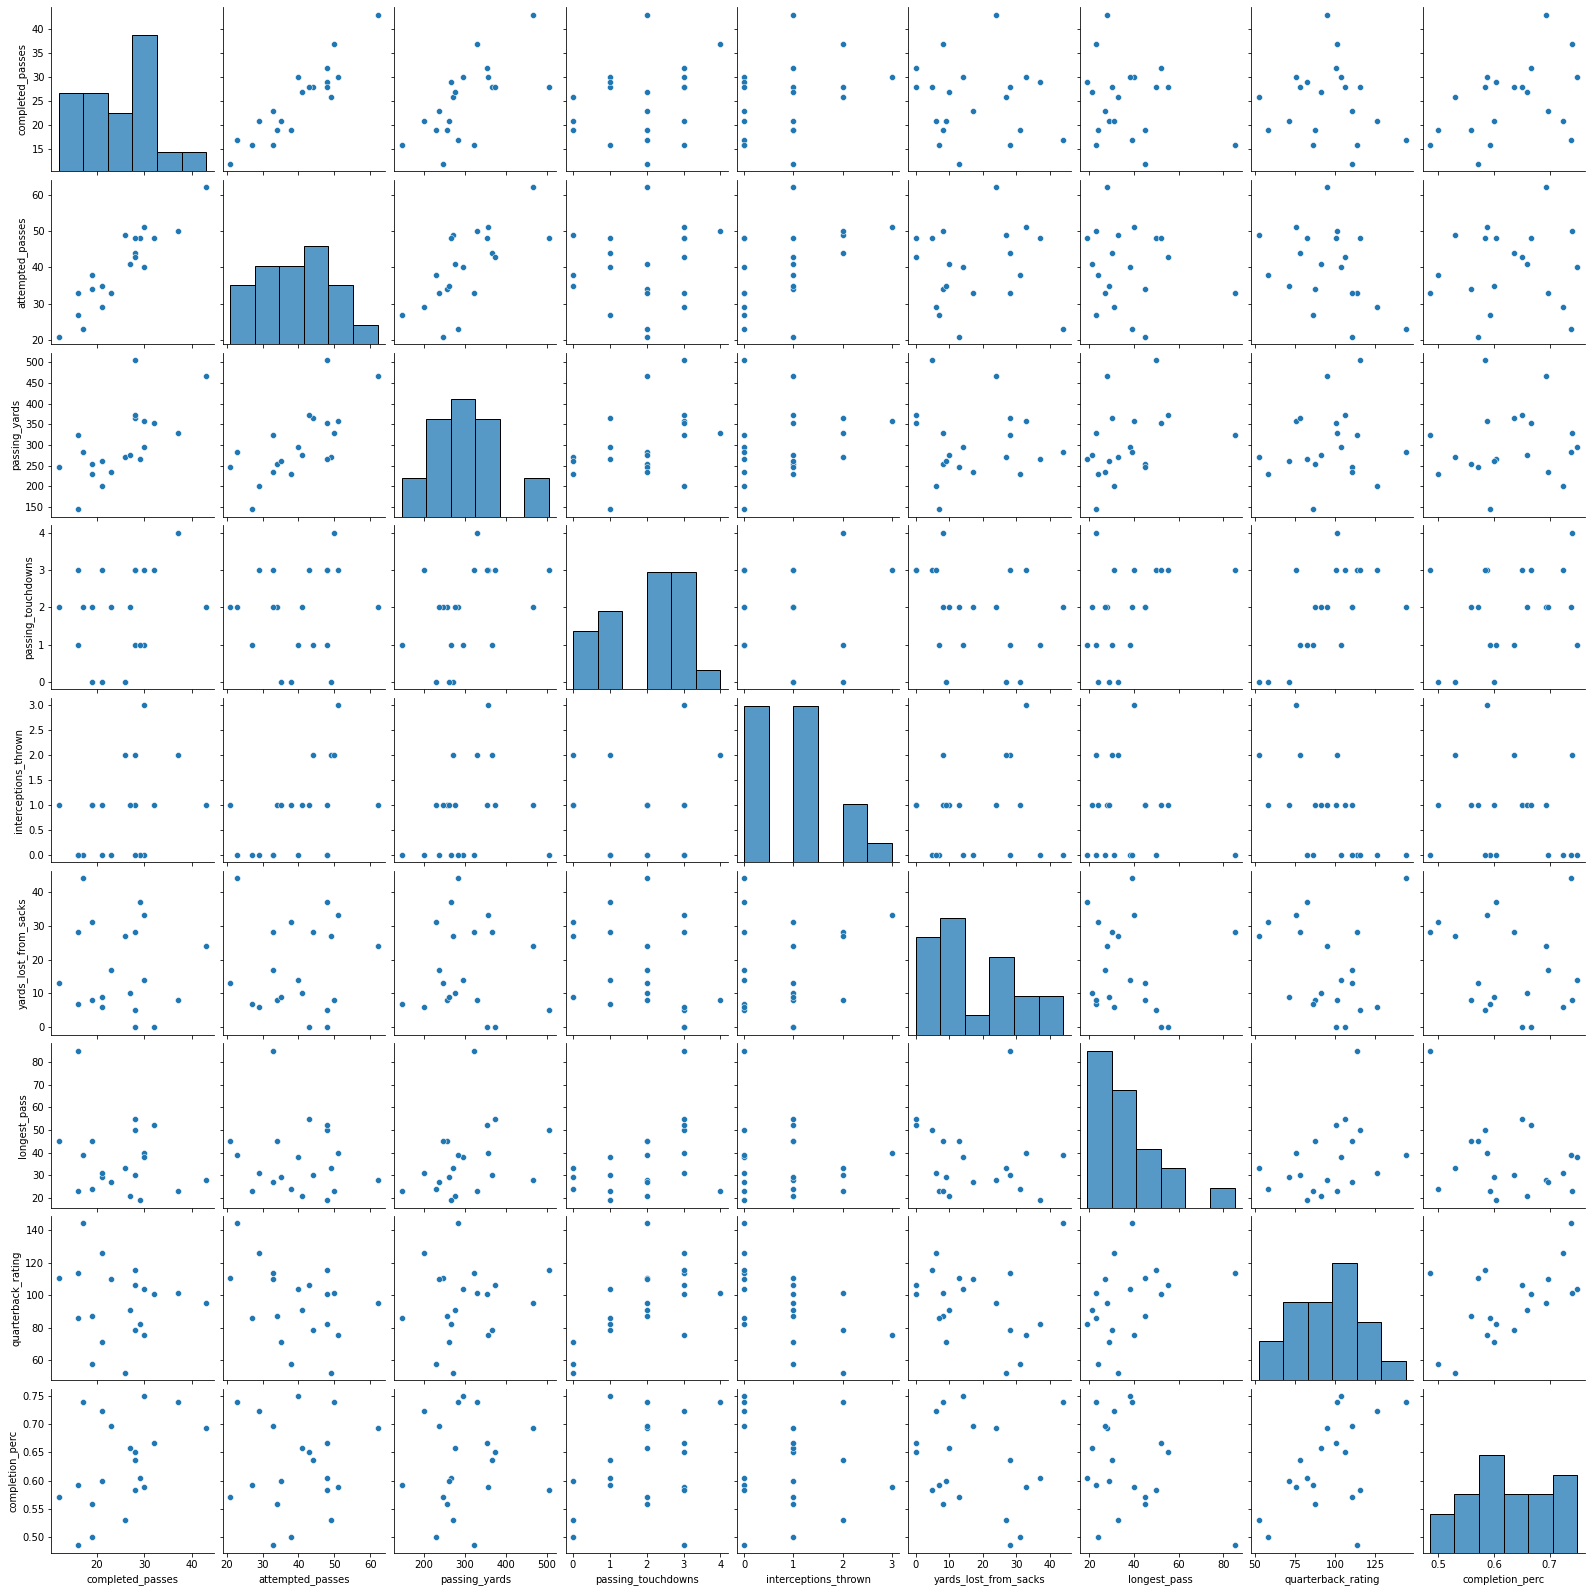

In [33]:
# let's look of the distribution
plt.figure(figsize=(10,10))
qb_adj=['completed_passes','attempted_passes','passing_yards','passing_touchdowns',
        'interceptions_thrown','yards_lost_from_sacks','longest_pass','quarterback_rating', 'completion_perc']

sns.pairplot(qb_df[qb_adj], palette='Blues')

<AxesSubplot:>

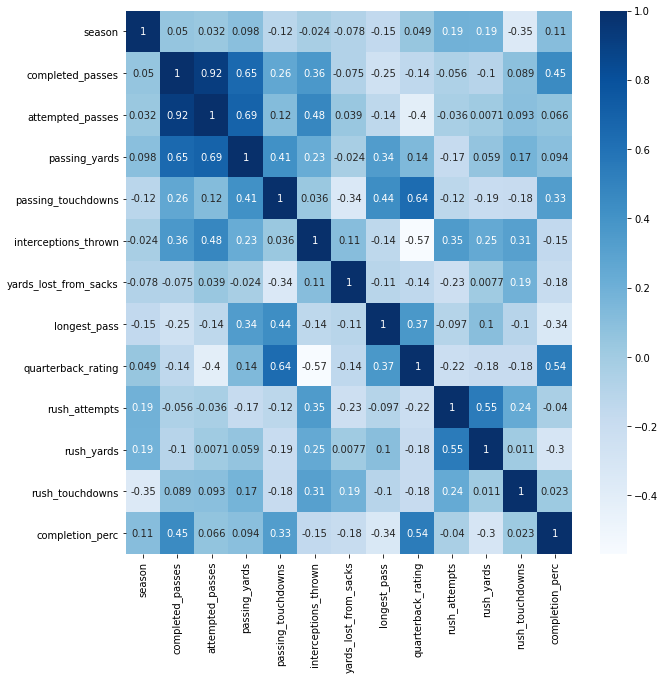

In [34]:
# Now lets look at the relationship between all of our attributes
plt.figure(figsize=(10,10))
qb_mx=qb_df.corr()
sns.heatmap(qb_mx, annot=True, cmap='Blues')

Now that we have good feel for what is useful for QB ratings and expectation of what some numbers are, let's note some observations:
- There's a high correlation between attempted passess and completed passes (makes sense) 
- High negative correlation between quarteback rating and interceptions thrown
- High correlation between quarterback rating and passing touchdowns
- Completed and attempted passes correlate strongly with passing yards

Most of these points are fairly obvious and intuitive. However, this is because I have fair understanding of the game of football. In more abstract or niche circumstances, this may not be the case.

### (Business) Context

Obviously, the general rules and mechanics of professional football are fairly well known to most people. As such the model we're working with can be fairly well explained with little dialogue. However, it's still important to consider context. For this broad example, I had asked the question of "is Tom Brady still a good quarterback?". However, we also need to consider what actions we can take with that information? Which also naturally leads to the question of, who is making the decision?

To explore this further, I personally can take action with this information in evaluating whether or not I should draft Tom Brady in my next fantasy draft (ignoring the fact that the superbowl doesn't factor in to fantasy team performance). I could also imagine for our purposes that I am advising a GM, coach, or offensive coordinater on how valuable Tom Brady still is. I could also assume I am a defensive coordinater and I want to design an effective defense around Tom Brady.

## Analysis

So now, I actually need to start doing real analysis (not the field of mathematics). I generally bucket these in to three meaningful classes; Reporting, Ad-Hoc Analysis and Testing, and Modeling. The distinction between all three is where the onus of a decision lies. Remember, all analysis should have an actionable insight, otherwise it is worthless. 

I also want to state that this list is not exhaustive, nor are these tools discrete. End deliverables may easily incorporate all three elements. Additionally, as I am both the analyst and the stake holder, the distinction between reporting and ad-hoc analysis is generally neglible. 

### Reporting

The first analysis deliverable is a report. Generally intended by refreshable and cadenced. The value to the analyst however, is a peak behind the curtain of what the stakeholders decision making process, which is incredibly valuable for the other two tools. 

As for the delivery of this information, I would generally rely on another tool such as Tableau, Power BI, or Looker for final delivery of the information. I have used Jupyter notebooks for some reporting, however this tends to confuse non-technical users. 

#### Tom Brady Performance

In [121]:
# The simplest form of reporting is tabular information

# Let's contrast that against all quarterbacks Tom Brady has faced off against
def is_tb(x):
    if str(x)=='Tom Brady':
        return 'Tom Brady'
    else:
        return 'Opposing Quarterback'

qb_df['tb']=qb_df['name']
qb_df['tb']=qb_df['tb'].apply(lambda x: is_tb(x))

# then present the tabular information 
print('Tom Brady vs. Opposing Quarterback for all Tom Brady Superbowl Performances')
qb_df[['name','season','completion_perc', 'quarterback_rating', 'passing_yards','interceptions_thrown']].sort_values(['season','name'])

Tom Brady vs. Opposing Quarterback for all Tom Brady Superbowl Performances


,name,season,completion_perc,quarterback_rating,passing_yards,interceptions_thrown
571,Kurt Warner,2001.0,0.636364,78.3,365.0,2.0
539,Tom Brady,2001.0,0.592593,86.2,145.0,0.0
474,Jake Delhomme,2003.0,0.484848,113.6,323.0,0.0
508,Tom Brady,2003.0,0.666667,100.5,354.0,1.0
446,Donovan McNabb,2004.0,0.588235,75.4,357.0,3.0
412,Tom Brady,2004.0,0.696970,110.2,236.0,0.0
380,Eli Manning,2007.0,0.558824,87.3,255.0,1.0
349,Tom Brady,2007.0,0.604167,82.5,266.0,0.0
318,Eli Manning,2011.0,0.750000,103.7,296.0,0.0
289,Tom Brady,2011.0,0.658537,91.1,276.0,1.0


<AxesSubplot:title={'center':"Tom Brady's Quarterback Rating for all Superbowl Appearances"}, xlabel='season', ylabel='quarterback_rating'>

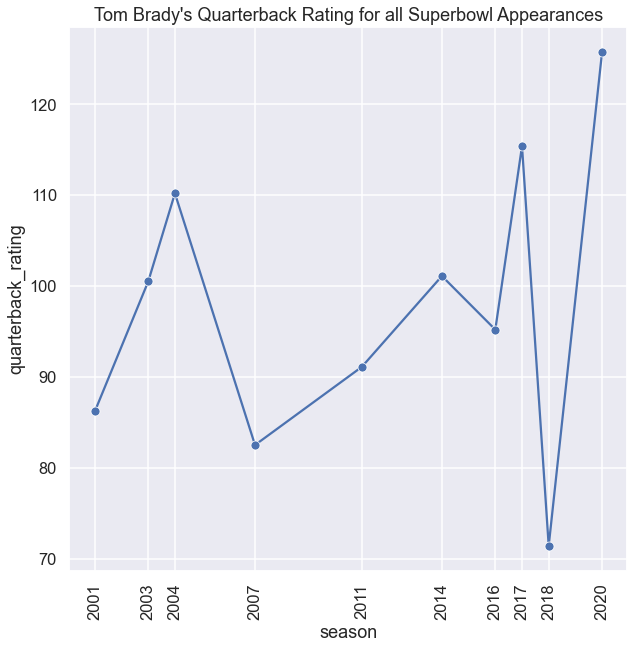

In [123]:
# Let's start with a simple graph of his quarterback rating 
tb_df=qb_df[qb_df['name']=='Tom Brady']

sns.set_context('talk')
plt.figure(figsize=(10,10))
plt.xticks(list(sb_app.values()), rotation='vertical')
plt.title('Tom Brady\'s Quarterback Rating for all Superbowl Appearances')
sns.lineplot(data=tb_df, x='season', y='quarterback_rating', marker='o')

<AxesSubplot:title={'center':"Tom Brady's Quarterback Rating vs. Opposing QB's in Superbowl Appearances"}, xlabel='season', ylabel='quarterback_rating'>

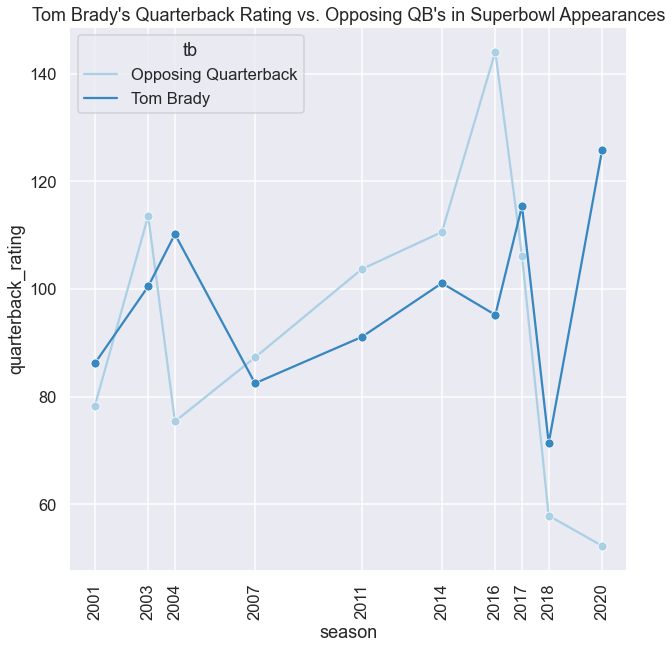

In [124]:
# plotting our comparison data of quarterback rating
sns.set_context('talk')
plt.figure(figsize=(10,10))
plt.xticks(list(sb_app.values()), rotation='vertical')
plt.title('Tom Brady\'s Quarterback Rating vs. Opposing QB\'s in Superbowl Appearances')
sns.lineplot(data=qb_df, x='season', y='quarterback_rating', hue='tb', palette='Blues', marker='o')

<AxesSubplot:title={'center':"Tom Brady's Completion Percentage vs. Opposing QB's in Superbowl Appearances"}, xlabel='season', ylabel='completion_perc'>

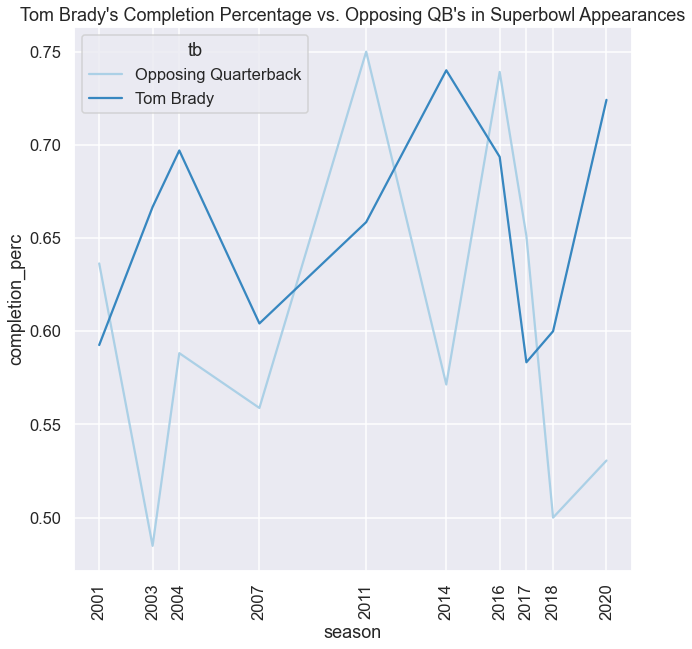

In [122]:
# plotting our comparison data of quarterback rating
sns.set_context('talk')
plt.figure(figsize=(10,10))
plt.xticks(list(sb_app.values()), rotation='vertical')
plt.title('Tom Brady\'s Completion Percentage vs. Opposing QB\'s in Superbowl Appearances')
sns.lineplot(data=qb_df, x='season', y='completion_perc', hue='tb', palette='Blues')

### Ad-Hoc Analysis

As mentioned above, the distinction between ad-hoc analysis and reporting is pretty thin when only one person is doing both the analysis and the decision making. So in this instance. I want to ask some more pointed questions, like how did tom Brady fair against the dual threat quarterback craze of the 2010's?

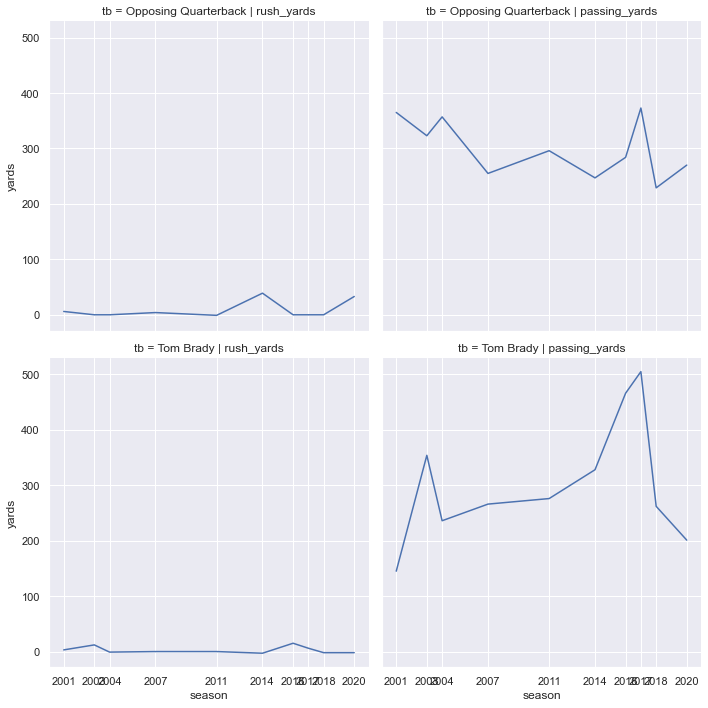

In [117]:
# Let's look at the yardage types between quarter backs 
# first we'll have to melt the dataframe

qb_df_melt=pd.melt(frame=qb_df, id_vars=['season','tb'], value_vars=['rush_yards', 'passing_yards'], var_name='yard_type', value_name='yards')


sns.set_context('talk')
sns.set(rc={'figure.figsize':(100,100)})
qb_fg=sns.FacetGrid(qb_df_melt, col='yard_type', row='tb', palette='Blues', height=5, aspect=1)
qb_fg.map(sns.lineplot, 'season', 'yards')
qb_fg.set_titles(col_template="{col_name}", row_template="{row_name}")
qb_fg.set(xticks=list(sb_app.values()))
qb_fg.tight_layout()

Seems to me that a neglible amount of rush yards were ever even attained by the quarterbacks. But we are gleaning something useful here. If we look at the completion rates above, we see that while Tom Brady's passing yards have actually gone down, he is still consistantly making completions. This could be do to the fact that he is either being more cautious with his throws, or he is clinching big plays when they are needed. 

To examine this, I want to plot his passing touchdowns and interceptions thrown to see if my hypothesis holds water.

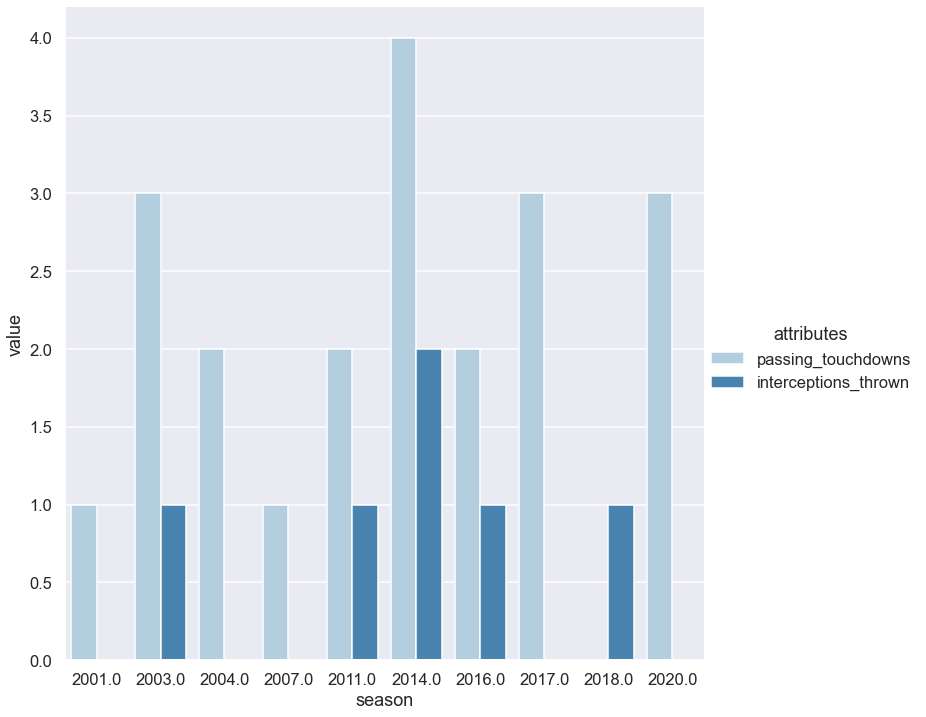

In [128]:

tb_df_melt=pd.melt(frame=tb_df, id_vars=['season','name'], value_vars=['passing_touchdowns', 'interceptions_thrown'], var_name='attributes', value_name='value')            
            

sns.set_context('talk')
sns.catplot(data=tb_df_melt, x='season', y='value', hue='attributes', kind='bar', height=10, aspect=1, palette='Blues')


As you can see from above, Tom Brady still has potential a quarterback that function as a "closer" punctuating a drive. This is demonstrated by his decreasing number of passing yards, and consistent number of touchdowns and interceptions. This definitely does beg the question of why he was not being utilized in his 2018 showing. 

### Modeling

So lastly, we have the ability to model our data. This allows to make determinations or predictions without human intervention. For this example, let's say that we don't know the formula behind QB rating and we want to estimate what that is systematically. 

In [139]:
# Let's just do the classic multilinear regressions
X=qb_df[['completed_passes','attempted_passes','passing_yards','passing_touchdowns','interceptions_thrown','yards_lost_from_sacks','longest_pass']]
y=qb_df[['quarterback_rating']]

multi_reg=linear_model.LinearRegression()
multi_reg.fit(X,y)


y_pred=multi_reg.predict(X)
qb_df.loc[:,'qb_rating_pred']=y_pred
qb_df.loc[:,'abs_error']=np.abs(qb_df['quarterback_rating']-qb_df['qb_rating_pred'])

print('The mean squared error of our multivariate regression is {:.2f}'.format(np.mean(qb_df['abs_error'])))
print('The R Squared value of our multivariate regression is {:.2f}'.format(multi_reg.score(X,y)))
print('\nHere are the predictions broken for all of our quarterbacks')

qb_df[['name','season','quarterback_rating','qb_rating_pred','abs_error']]

The mean squared error of our multivariate regression is 2.58
The R Squared value of our multivariate regression is 0.98

Here are the predictions broken for all of our quarterbacks


,name,season,quarterback_rating,qb_rating_pred,abs_error
446,Donovan McNabb,2004.0,75.4,76.558185,1.158185
380,Eli Manning,2007.0,87.3,88.717021,1.417021
318,Eli Manning,2011.0,103.7,105.852634,2.152634
474,Jake Delhomme,2003.0,113.6,117.478571,3.878571
90,Jared Goff,2018.0,57.9,62.417681,4.517681
571,Kurt Warner,2001.0,78.3,81.669542,3.369542
170,Matt Ryan,2016.0,144.1,139.651628,4.448372
141,Nick Foles,2017.0,106.1,104.905862,1.194138
0,Patrick Mahomes,2020.0,52.3,42.494446,9.805554
261,Russell Wilson,2014.0,110.6,109.615565,0.984435


The above model is pretty accurate. With an R squared value of .98 and mean absolute error of less than 3, I'm pretty confident in this model's ability to predict what a QB's rating is. However, there a lot of things I would still need to do stand up a robust model; split training and testing data, expand my sample size, and potentially get more data. 

Additionally, the other reason our model did so well is that the quarterback rating is incredibly deterministic in as a linear model and we already had all the inputs in to model. However, this still does demonstrate the value of regressions in a way; we can back out fairly complicated deterministic relationships just by throwing data at it.

<img src="../img/qb_rating_eq.png" alt="QB Rating Calc." width=500 style="float:left"/>

## Execution

### Communication
Lastly comes one of the trickiest pieces, communicating the results of your analysis. Whatever medium the commuincation takes (e.g. slide deck, email, dashboard, recurring report, etc.), the material should make clear what you are doing, what the current circumstances are, and what the recommendation is. Generally, speaking I would deliver this piece in another format, such as power point or tableau. However, to conclude, I think that Tom Brady still has some years in him but his role as quarterback may be changing. 

### Deliveribles/Accessibility 
Fortunately, due to the nature of what I've stood up here, it would be fairly simple to update what I've created. However, I'm still a long way off from what a live system unfortunately.

### Follow-Up
Additional analysis to be done:
- Expand scope to Brady's whole career
- See the quality of his recievers over his career
- Explore performances against specific defenses